In [2]:
import drawsvg as dw
%load_ext jhmagics

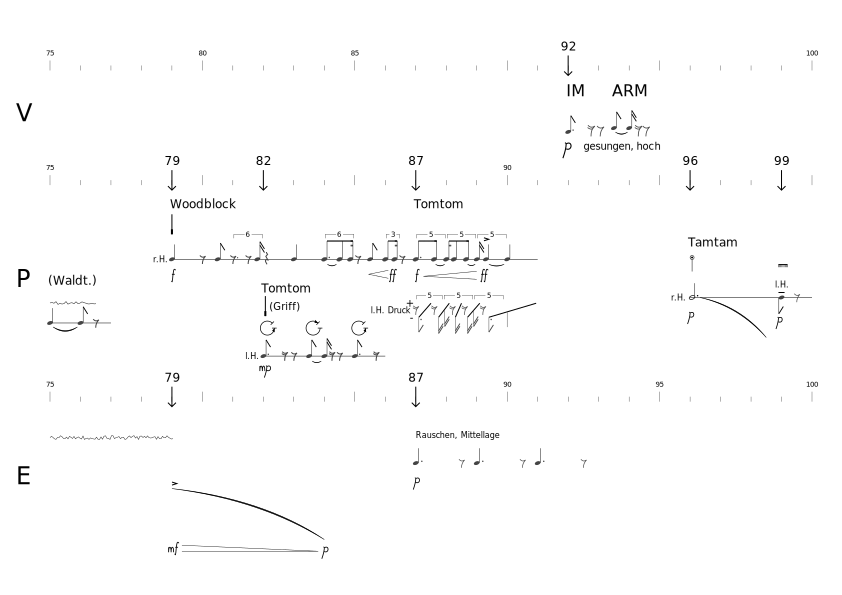

In [3]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# fonts: Simvoni für zahlen und text sprechstimme
#        Cantarell für musikalische anweisungen

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 75  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[75,80,85,100],[75,90],[75,90,95,100]]
 # events in V P E
event = [[92],[79,82,87,96,99],[79,87]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-34,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

 # im arm
x = xg(92)
ygindxvtop = yleisten[0]+.8
ygindxtext = ygindxvtop+.8 #text basline
text('IM',x-2,yg(ygindxtext),16)
text('ARM',xg(93.5)-2,yg(ygindxtext),16)
not8tel(x,yg(ygindxvtop+2.2),nothals,notsiz,dotted=1)
paus16tel(xg(92.75),yg(ygindxvtop+2.15),pausiz+1)
paus8tel(xg(93.05),yg(ygindxvtop+2.15),pausiz+1)
yy = yg(ygindxvtop+2.05)
not8tel(xg(93.5),yy,nothals,notsiz)
tie(xg(93.55),yy+4,xg(93.95),yy+4,1.5,.5)
not16tel(xg(94),yy,nothals,notsiz)
paus16tel(xg(94.3),yg(ygindxvtop+2.15),pausiz+1)
paus8tel(xg(94.55),yg(ygindxvtop+2.15),pausiz+1)
text('gesungen, hoch',xg(92.5),ygrid(ygindxtext+2.1),10,font_family='Cantarell Light',font_style='italic')
piano(x-2,yg(ygindxtext+2.1),13)



################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
ylinienwt = ypercindx+6
ylinienwb = ypercindx+3.5
ylinientm1 = ypercindx+7.3
ylinientm2 = ylinienwb
ylinientam = ypercindx+5
startends = [75,77,79,87,82,86,87,91,96,100]
insnamen = ['(Waldt.)','Woodblock','Tomtom','Tomtom','Tamtam']
yoffsetins = [1.5,2,2.5,2,2] #abstand der namen von den linien
for i,yl in enumerate([ylinienwt,ylinienwb,ylinientm1,ylinientm2,ylinientam]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==1: text('r.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
    if i==2: text('l.H.',x1-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')


 # waldteufel
y = yg(ylinienwt)
yy = y+4
not4tel(xg(75),y,nothals,notsiz)
tie(xg(75.1),yy,xg(75.9),yy,1.5,.5)
not8tel(xg(76),y,nothals,notsiz)
yyy = y-20
kratzgliss(xg(75),yyy,xg(76.5),yyy,1.5,1.5,2)
paus8tel(xg(76.5),y,pausiz,1.5)


 # woodblock
y = yg(ylinienwb)
x = xg(79)
percDrumstick(x,y-45)
not4tel(x,y,nothals,notsiz)
forte(x,y+20,dynsiz)
paus8tel(xg(80),y,pausiz,1.5)
not8tel(xg(80.5),y,nothals,notsiz)
paus8tel(xg(81),y,pausiz,1.5,dotted=1)
paus8tel(xg(81.5),y,pausiz,1.5)
not16tel(xg(81.8),y,nothals,notsiz)
yy = y-25
nlet(xg(81),yy,xg(82),yy,text='6')
paus4tel(xg(82.1),y-2,pausiz,1.5)
not4tel(xg(83),y,nothals,notsiz)
gruppe([xg(84),y,xg(84.5),y,xg(84.85),y],balken=[1,1,2],dotlist=[1,0,0],y_space=notsiz)
tie(xg(84.1),y+5,xg(84.4),y+5,1.5,.5)
nlet(xg(84),yy,xg(85),yy,text='6')
paus8tel(xg(85.1),y,pausiz,1.5)
not8tel(xg(85.5),y,nothals,notsiz)
cresc(xg(85.45),y+15,xg(86.1),y+15,8)
gruppe([xg(86),y,xg(86.3),y],balken=[1,2],y_space=notsiz)
nlet(xg(86),yy,xg(86.5),yy)
fortissimo(xg(86.2),y+20,dynsiz)
paus8tel(xg(86.55),y,pausiz,1.5)

 # tom tom linke hand
y = yg(ylinientm1)
x = xg(82)
percDrumstick(x+2,y-60)
text('(Griff)',x+6,y-46,10,font_family='Cantarell Light',font_style='italic')
kreisStartEnd(x+4,y-28,7,45,-270)
not8tel(x,y,nothals,notsiz,dotted=1)
mezzopiano(x,y+15,dynsiz)
paus16tel(xg(82.7),y,pausiz,1.5)
paus8tel(xg(83),y,pausiz,1.5)
kreisStartEnd(xg(83.5)+4,y-28,7,90,405)
not8tel(xg(83.5),y,nothals,notsiz)
tie(xg(83.6),y+5,xg(83.9),y+5,1.5,.5)
not16tel(xg(84),y,nothals,notsiz)
paus16tel(xg(84.25),y,pausiz,1.5)
paus8tel(xg(84.5),y,pausiz,1.5)
kreisStartEnd(xg(85)+4,y-28,7,45,-270)
not8tel(xg(85),y,nothals,notsiz,dotted=1)
paus16tel(xg(85.7),y,pausiz,1.5)

 # tom rechte hand
y = yg(ylinienwb)
yy = y-25
gruppe([xg(87),y,xg(87.6),y],balken=[1,1],dotlist=[1,0],y_space=notsiz)
tie(xg(87.65),y+5,xg(87.95),y+5,1.5,.5)
gruppe([xg(88),y,xg(88.25),y,xg(88.65),y],balken=[2,1,1],y_space=notsiz)
tie(xg(88.7),y+5,xg(88.95),y+5,1.5,.5)
not16tel(xg(89),y,nothals,notsiz)
not4tel(xg(89.3),y,nothals,notsiz)
accent(xg(89.3),yy+5,6)
tie(xg(89.4),y+5,xg(89.9),y+5,1,.5)
not4tel(xg(90),y,nothals,notsiz)
nlets(xg(87),yy,xg(88),yy,num=3,text='5')
forte(xg(87),y+20,dynsiz)
fortissimo(xg(89.2),y+20,dynsiz)
cresc(xg(87.25),y+17,xg(89),y+16,8)

  # linke hand
x = xg(87)
y = yg(ylinienwb+2)
yplus = y-7
yminus = y+7
yy = y-15
text('l.H. Druck',x-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('+',x-2,yplus,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
text('-',x-2,yminus,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
paus16tel(x,y,pausiz)
line(xg(87.1),yminus,xg(87.5),yplus)
hals8tel(xg(87.1),yminus,-nothals,notsiz,dotted=1)
paus16tel(xg(87.6),y,pausiz)
line(xg(87.75),yminus,xg(88.1),yplus)
hals16tel(xg(87.75),yminus,-nothals,notsiz)
hals16tel(xg(87.95),y,-nothals,notsiz)
paus16tel(xg(88.2),y,pausiz)
line(xg(88.3),yminus,xg(88.5),yplus)
hals16tel(xg(88.3),yminus,-nothals,notsiz)
paus16tel(xg(88.6),y,pausiz)
line(xg(88.7),yminus,xg(89.1),yplus)
hals16tel(xg(88.7),yminus,-nothals,notsiz)
hals16tel(xg(88.9),y,-nothals,notsiz)
paus16tel(xg(89.2),y,pausiz)
line(xg(89.4),yminus,xg(90.95),yplus)
hals8tel(xg(89.4),yminus,-nothals,notsiz,dotted=1)
hals4tel(xg(90),y+2,-nothals,notsiz)
nlet(xg(87),yy,xg(87.9),yy,text='5')
nlet(xg(87.9),yy,xg(88.9),yy,text='5')
nlet(xg(88.9),yy,xg(89.9),yy,text='5')

 # tamtam
x = xg(96)
y = yg(ylinientam)
percSuperball(x+2,y-40)
text('r.H.',x-5,y,8,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
not2tel(x+2,y,nothals,notsiz,dotted=1,dotspace=1.25)
piano(x,y+20,dynsiz)
glisscurve(x+10,y,xg(98.5),y+40,sw=.5,swdiff=.5)
not8tel(xg(99),y,-nothals,notsiz)
yy = y-5
line(xg(98.9),yy,xg(99.1),yy)
piano(xg(98.9),y+25,dynsiz)
text('l.H.',xg(99),yy-5,8,text_anchor='middle',font_family='Cantarell')
buerste(xg(98.9),y-33,notsiz)
paus8tel(xg(99.5),y,pausiz)


################# ELEKTRONIK #################

 # von voriger seite
y = yg(16)
kratzgliss(xg(75),y,xg(79),y,h=2,prd=1.5)

 # event 79
x = xg(79)
y = yg(18)
glisscurve(x,y,xg(84),yg(20),sw=.5,swdiff=.5)
accent(x+2,y-5,6)
yy = yg(20.5)
mezzoforte(x,yy,dynsiz)
piano(xg(84),yy,dynsiz)
dim(x+10,yy-4,xg(83.8),yy-1,6)

 # event 87
x = xg(87)
y = yg(17)
text('Rauschen, Mittellage',x,y-25,8,font_family='Cantarell Light')
piano(x,y+20,dynsiz)
not4tel(x,y,nothals,notsiz,dotted=1,dotspace=1.5)
paus8tel(xg(88.5),y,pausiz)
not4tel(xg(89),y,nothals,notsiz,dotted=1,dotspace=1.5)
paus8tel(xg(90.5),y,pausiz)
not4tel(xg(91),y,nothals,notsiz,dotted=1,dotspace=1.5)
paus8tel(xg(92.5),y,pausiz)


#d.set_pixel_scale(4)
#d.save_png('partitur_04.png')
#d.save_svg('partitur_04.svg')
d

In [95]:
help(dim)

Help on function dim in module __main__:

dim(x=10, y=30, xend=30, yend=30, h=10, sw=0.4, c='black', **args)
    diminuendo
    x,y ist in der mitte am anfang
    xend,yend ist der endpunkt
    h ist die gesamthöhe am anfang

